For DATASET-II

In [1]:
import os
import librosa
import numpy as np
from scipy.io.wavfile import write
from pydub import AudioSegment
from pydub.silence import split_on_silence

# Define paths
input_base_path = r'E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar'
output_base_path = r'E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\Cleaned_ReadText'
folders = ['HC', 'PD']

# Helper function to perform noise reduction
def noise_reduction(y, sr, reduction_factor=0.8):
    noise_sample = y[:sr]  # Take the first second as a noise sample
    noise_profile = np.mean(np.abs(noise_sample)) * reduction_factor
    return np.where(np.abs(y) > noise_profile, y, 0)  # Zero out low-amplitude noise

# Function to process and clean each file
def process_audio(file_path, output_path, silence_thresh=-40, min_silence_len=500):
    try:
        # Load the audio file
        y, sr = librosa.load(file_path, sr=None)

        # Noise reduction
        y_cleaned = noise_reduction(y, sr)

        # Convert to Pydub AudioSegment for silence splitting
        audio_segment = AudioSegment(
            y_cleaned.tobytes(), 
            frame_rate=sr, 
            sample_width=y_cleaned.dtype.itemsize, 
            channels=1
        )

        # Split on silence
        chunks = split_on_silence(
            audio_segment,
            min_silence_len=min_silence_len,  # Minimum silence length to split
            silence_thresh=silence_thresh  # Silence threshold in dB
        )

        # Concatenate chunks to remove silences
        cleaned_audio = AudioSegment.empty()
        for chunk in chunks:
            cleaned_audio += chunk

        # Export cleaned audio
        cleaned_audio.export(output_path, format="wav")
        print(f"Processed {file_path} and saved to {output_path}")

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Main processing loop
for folder in folders:
    input_folder = os.path.join(input_base_path, folder)
    output_folder = os.path.join(output_base_path, f"{folder}_Cleaned")
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(input_folder):
        if filename.endswith(".wav"):
            input_file = os.path.join(input_folder, filename)
            output_file = os.path.join(output_folder, filename)
            process_audio(input_file, output_file)


C:\ProgramData\Anaconda3\envs\Tremor_tf\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Processed E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\HC\AVPEPUDEAC0001_readtext.wav and saved to E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\Cleaned_ReadText\HC_Cleaned\AVPEPUDEAC0001_readtext.wav
Processed E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\HC\AVPEPUDEAC0003_readtext.wav and saved to E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\Cleaned_ReadText\HC_Cleaned\AVPEPUDEAC0003_readtext.wav
Processed E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\HC\AVPEPUDEAC0004_readtext.wav and saved to E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\Cleaned_ReadText\HC_Cleaned\AVPEPUDEAC0004_readtext.wav
Processed E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\HC

Original Duration: 14.21 seconds
Cleaned Duration: 11.37 seconds
Time Reduced: 2.84 seconds


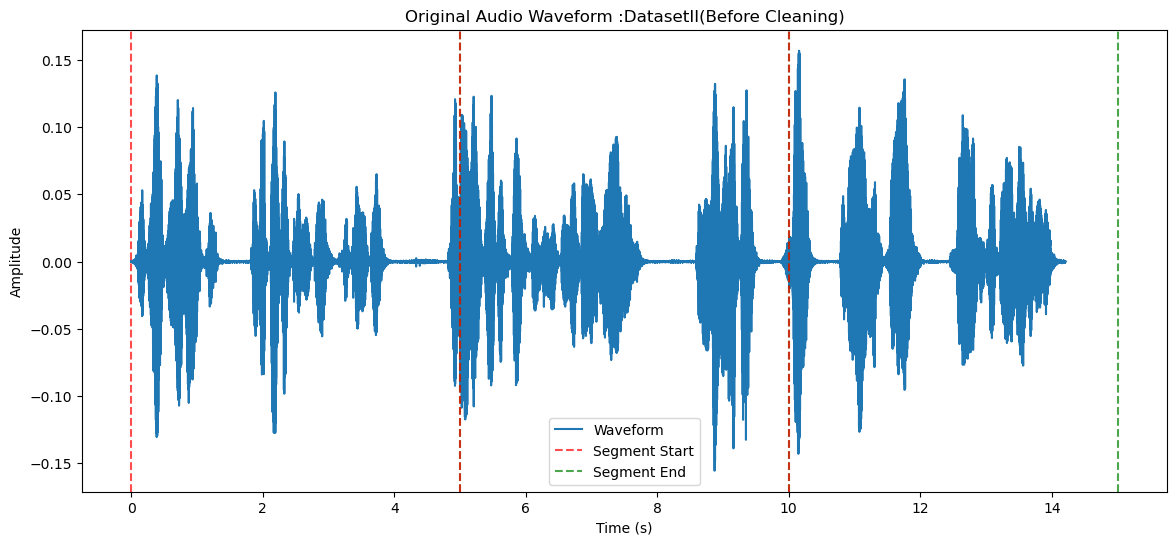

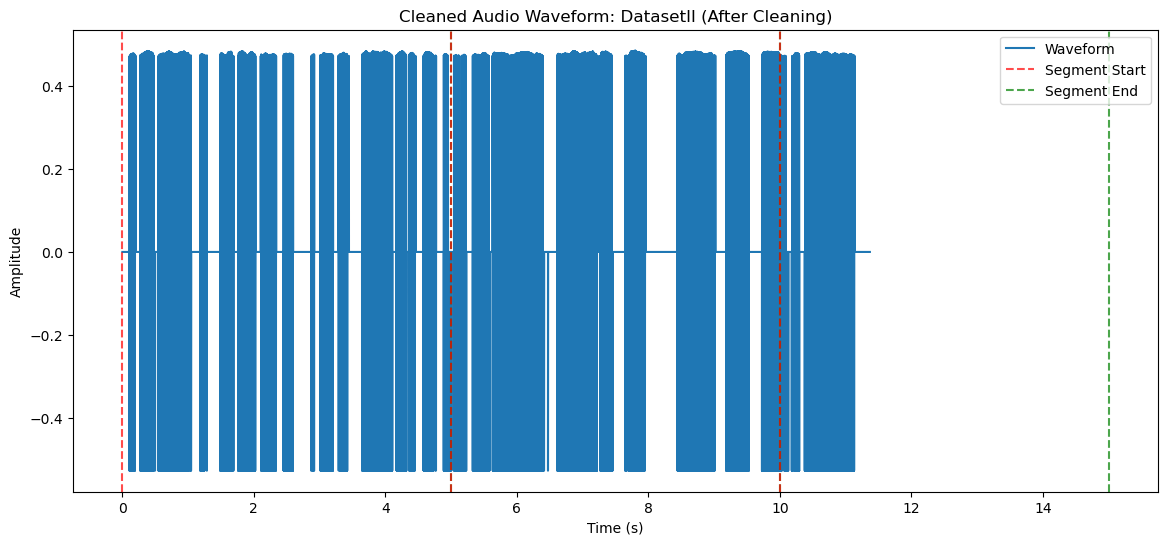

In [6]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Define paths for an example audio file (before and after cleaning)
original_file = r'E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\PD\AVPEPUDEA0034_readtext.wav'
cleaned_file = r'E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\Cleaned_ReadText\PD_Cleaned\AVPEPUDEA0034_readtext.wav'

# Load audio files
y_original, sr = librosa.load(original_file, sr=None)
y_cleaned, sr_cleaned = librosa.load(cleaned_file, sr=None)

# Calculate durations before and after cleaning
original_duration = len(y_original) / sr
cleaned_duration = len(y_cleaned) / sr
reduction = original_duration - cleaned_duration

# Print the durations
print(f"Original Duration: {original_duration:.2f} seconds")
print(f"Cleaned Duration: {cleaned_duration:.2f} seconds")
print(f"Time Reduced: {reduction:.2f} seconds")

# Define a function to plot waveforms with segmentation
def plot_waveform(y, sr, title, segment_duration=5):
    plt.figure(figsize=(14, 6))
    time = np.linspace(0, len(y) / sr, len(y))
    plt.plot(time, y, label="Waveform")
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    # Plot each segment
    segment_samples = segment_duration * sr
    num_segments = len(y) // segment_samples
    for i in range(num_segments + 1):
        start = i * segment_samples
        end = start + segment_samples
        plt.axvline(x=start / sr, color="r", linestyle="--", alpha=0.7)
        plt.axvline(x=end / sr, color="g", linestyle="--", alpha=0.7)
    
    plt.legend(['Waveform', 'Segment Start', 'Segment End'])
    plt.show()

# Plot the original waveform with segmentation
plot_waveform(y_original, sr, "Original Audio Waveform :DatasetII(Before Cleaning)")

# Plot the cleaned waveform with segmentation
plot_waveform(y_cleaned, sr_cleaned, "Cleaned Audio Waveform: DatasetII (After Cleaning)")


In [11]:
import os
import librosa
import numpy as np
import pandas as pd
from pydub import AudioSegment
from pydub.silence import split_on_silence

# Define paths
original_file = r'E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar'
cleaned_file = r'E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\Cleaned_ReadText'

folders = ['HC', 'PD']

# Initialize an empty list to store data for the table
duration_data = []

# Helper function to perform noise reduction
def noise_reduction(y, sr, reduction_factor=1.2):  # Increased reduction factor
    noise_sample = y[:sr]  # Take the first second as a noise sample
    noise_profile = np.mean(np.abs(noise_sample)) * reduction_factor
    return np.where(np.abs(y) > noise_profile, y, 0)

# Function to process and clean each file
def process_audio(file_path, output_path, silence_thresh=-25, min_silence_len=1000):  # Adjusted parameters
    try:
        # Load the original audio file and calculate its duration
        y, sr = librosa.load(file_path, sr=None)
        original_duration = len(y) / sr

        # Apply noise reduction and calculate duration after noise reduction
        y_cleaned = noise_reduction(y, sr, reduction_factor=1.2)
        noise_reduced_duration = len(y_cleaned[y_cleaned != 0]) / sr  # Count only non-zero samples

        # Convert to Pydub AudioSegment to enable silence splitting
        audio_segment = AudioSegment(
            y_cleaned.tobytes(), 
            frame_rate=sr, 
            sample_width=y_cleaned.dtype.itemsize, 
            channels=1
        )

        # Split on silence with more aggressive parameters
        chunks = split_on_silence(
            audio_segment,
            min_silence_len=min_silence_len,  # Minimum silence length to split
            silence_thresh=silence_thresh  # Silence threshold in dB
        )

        # Concatenate chunks to remove silences
        cleaned_audio = AudioSegment.empty()
        for chunk in chunks:
            cleaned_audio += chunk

        # Calculate final duration after silence removal
        final_duration = len(cleaned_audio) / 1000  # Convert from ms to seconds

        # Export cleaned audio
        cleaned_audio.export(output_path, format="wav")
        print(f"Processed {file_path} and saved to {output_path}")

        # Append data for this file to the table
        duration_data.append({
            "Filename": os.path.basename(file_path),
            "Original Duration (s)": original_duration,
            "After Noise Reduction (s)": noise_reduced_duration,
            "After Silence Removal (s)": final_duration
        })

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Main processing loop
for folder in folders:
    input_folder = os.path.join(input_base_path, folder)
    output_folder = os.path.join(output_base_path, f"{folder}_Cleaned")
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(input_folder):
        if filename.endswith(".wav"):
            input_file = os.path.join(input_folder, filename)
            output_file = os.path.join(output_folder, filename)
            process_audio(input_file, output_file)

# Convert duration data to a DataFrame and display the table
duration_df = pd.DataFrame(duration_data)
print("\nFinal Duration Data:")
print(duration_df.to_string(index=False))


Processed E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\HC\AVPEPUDEAC0001_readtext.wav and saved to E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\Cleaned_ReadTextCONVERTED\HC_Cleaned\AVPEPUDEAC0001_readtext.wav
Processed E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\HC\AVPEPUDEAC0003_readtext.wav and saved to E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\Cleaned_ReadTextCONVERTED\HC_Cleaned\AVPEPUDEAC0003_readtext.wav
Processed E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\HC\AVPEPUDEAC0004_readtext.wav and saved to E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\Cleaned_ReadTextCONVERTED\HC_Cleaned\AVPEPUDEAC0004_readtext.wav
Processed E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfu

In [2]:
import os
import librosa
import numpy as np
import pandas as pd
from pydub import AudioSegment
from pydub.silence import split_on_silence
from collections import Counter

# Define paths
input_base_path = r'E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar'
output_base_path = r'E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\Cleaned_ReadText'

folders = ['HC', 'PD']

# Initialize an empty list to store data for the table
duration_data = []
folder_sample_count = Counter()  # Counter to store sample count for each folder

# Helper function to perform noise reduction
def noise_reduction(y, sr, reduction_factor=1.2):  # Increased reduction factor
    noise_sample = y[:sr]  # Take the first second as a noise sample
    noise_profile = np.mean(np.abs(noise_sample)) * reduction_factor
    return np.where(np.abs(y) > noise_profile, y, 0)

# Function to process and clean each file
def process_audio(file_path, output_path, silence_thresh=-25, min_silence_len=1000):  # Adjusted parameters
    try:
        # Load the original audio file and calculate its duration
        y, sr = librosa.load(file_path, sr=None)
        original_duration = len(y) / sr

        # Apply noise reduction and calculate duration after noise reduction
        y_cleaned = noise_reduction(y, sr, reduction_factor=1.2)
        noise_reduced_duration = len(y_cleaned[y_cleaned != 0]) / sr  # Count only non-zero samples

        # Convert to Pydub AudioSegment to enable silence splitting
        audio_segment = AudioSegment(
            y_cleaned.tobytes(), 
            frame_rate=sr, 
            sample_width=y_cleaned.dtype.itemsize, 
            channels=1
        )

        # Split on silence with more aggressive parameters
        chunks = split_on_silence(
            audio_segment,
            min_silence_len=min_silence_len,  # Minimum silence length to split
            silence_thresh=silence_thresh  # Silence threshold in dB
        )

        # Concatenate chunks to remove silences
        cleaned_audio = AudioSegment.empty()
        for chunk in chunks:
            cleaned_audio += chunk

        # Calculate final duration after silence removal
        final_duration = len(cleaned_audio) / 1000  # Convert from ms to seconds

        # Export cleaned audio
        cleaned_audio.export(output_path, format="wav")
        print(f"Processed {file_path} and saved to {output_path}")

        # Append data for this file to the table
        duration_data.append({
            "Filename": os.path.basename(file_path),
            "Original Duration (s)": original_duration,
            "After Noise Reduction (s)": noise_reduced_duration,
            "After Silence Removal (s)": final_duration
        })

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Main processing loop
for folder in folders:
    input_folder = os.path.join(input_base_path, folder)
    output_folder = os.path.join(output_base_path, f"{folder}_Cleaned")
    os.makedirs(output_folder, exist_ok=True)
    folder_sample_count[folder] = 0  # Initialize sample count for the folder

    for filename in os.listdir(input_folder):
        if filename.endswith(".wav"):
            input_file = os.path.join(input_folder, filename)
            output_file = os.path.join(output_folder, filename)
            
            # Process audio and count samples
            process_audio(input_file, output_file)
            folder_sample_count[folder] += 1

# Print total number of samples for each folder
print("\nSample Count per Folder:")
for folder, count in folder_sample_count.items():
    print(f"{folder}: {count} samples")

# Convert duration data to a DataFrame and display the table
duration_df = pd.DataFrame(duration_data)
print("\nFinal Duration Data:")
print(duration_df.to_string(index=False))


C:\ProgramData\Anaconda3\envs\Tremor_tf\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Processed E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\HC\AVPEPUDEAC0001_readtext.wav and saved to E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\Cleaned_ReadText\HC_Cleaned\AVPEPUDEAC0001_readtext.wav
Processed E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\HC\AVPEPUDEAC0003_readtext.wav and saved to E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\Cleaned_ReadText\HC_Cleaned\AVPEPUDEAC0003_readtext.wav
Processed E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\HC\AVPEPUDEAC0004_readtext.wav and saved to E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\Cleaned_ReadText\HC_Cleaned\AVPEPUDEAC0004_readtext.wav
Processed E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\HC

In [3]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from scipy.ndimage import median_filter

# Define paths
input_base_path = r'E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\\Cleaned_ReadText'
output_base_path = r'E:\PC-GITA_per_task_44100Hz\PC-GITA_per_task_44100Hz\read text\ayerfuialmedico\sin normalizar\Cleaned_ReadTextCONVERTED'
categories = ['HC', 'PD']
types = ['chroma', 'cqt', 'mel', 'mfcc', 'stft']

# VAD segmentation parameters
vad_window_size = 0.02  # 20 ms window
merge_distance = 0.25  # 250 ms merge threshold
threshold_factor = 0.7  # Adjusted threshold factor

# Minimum segment duration in samples (e.g., 1 second)
min_segment_samples = int(1 * 44100)  # 44.1 kHz sample rate

# Helper function for short-term energy and spectral spread
def compute_energy_spread(y, sr, frame_length=2048, hop_length=512):
    st_energy = np.array([sum(abs(y[i:i+frame_length])**2) for i in range(0, len(y), hop_length)])
    st_energy = median_filter(st_energy, size=5)  # Apply median filter to smooth energy
    
    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr, hop_length=hop_length)
    spectral_spread = np.sqrt(np.mean((spectral_centroids - np.mean(spectral_centroids))**2))
    spectral_spread = median_filter(spectral_spread, size=5)  # Apply median filter to smooth spread
    
    return st_energy, spectral_spread

# Function to apply VAD and segment audio
def vad_segmentation(y, sr, st_energy, spectral_spread, threshold_factor=0.5):
    speech_segments = []
    
    # Calculate threshold values
    energy_threshold = np.percentile(st_energy, 30) * threshold_factor
    spread_threshold = np.percentile(spectral_spread, 30) * threshold_factor
    print(f"Energy threshold: {energy_threshold}, Spread threshold: {spread_threshold}")
    
    is_speech = (st_energy > energy_threshold) & (spectral_spread > spread_threshold)
    current_segment = []
    
    for i, frame in enumerate(is_speech):
        if frame:
            current_segment.append(i)
        elif current_segment:
            if len(speech_segments) > 0 and (i - speech_segments[-1][-1] <= int(merge_distance * sr / (vad_window_size * sr))):
                speech_segments[-1].extend(current_segment)
            else:
                if len(current_segment) * int(sr * vad_window_size) >= min_segment_samples:
                    speech_segments.append(current_segment)
            current_segment = []
    
    if not speech_segments:
        print("No segments found after applying thresholds.")
    return speech_segments

# Function to save spectrogram as image without padding or axis
def save_spectrogram(y_segment, sr, img_type, category_folder, filename):
    plt.figure(figsize=(6, 6))
    if img_type == 'chroma':
        chroma = librosa.feature.chroma_stft(y=y_segment, sr=sr)
        librosa.display.specshow(chroma, x_axis='time', y_axis='chroma')
    elif img_type == 'cqt':
        cqt = librosa.amplitude_to_db(np.abs(librosa.cqt(y_segment, sr=sr)), ref=np.max)
        librosa.display.specshow(cqt, sr=sr, x_axis='time', y_axis='cqt_note')
    elif img_type == 'mel':
        mel = librosa.feature.melspectrogram(y=y_segment, sr=sr)
        librosa.display.specshow(librosa.power_to_db(mel, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
    elif img_type == 'mfcc':
        mfcc = librosa.feature.mfcc(y=y_segment, sr=sr, n_mfcc=13)
        librosa.display.specshow(mfcc, x_axis='time')
    elif img_type == 'stft':
        n_fft = min(2048, len(y_segment) // 2)  # Dynamic n_fft based on segment length
        stft = librosa.amplitude_to_db(np.abs(librosa.stft(y_segment, n_fft=n_fft)), ref=np.max)
        librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='log')
    else:
        return

    plt.axis('off')  # Remove padding and titles
    output_img_path = os.path.join(category_folder, f"{filename}.png")
    plt.savefig(output_img_path, bbox_inches='tight', pad_inches=0)
    plt.close()

# Process each audio file
for category in categories:
    input_folder = os.path.join(input_base_path, category)
    category_label = 'HC' if 'HC' in category else 'PD'

    for filename in os.listdir(input_folder):
        if filename.endswith(".wav"):
            input_file = os.path.join(input_folder, filename)
            try:
                y, sr = librosa.load(input_file, sr=None)

                st_energy, spectral_spread = compute_energy_spread(y, sr)

                # Apply VAD and obtain speech segments
                speech_segments = vad_segmentation(y, sr, st_energy, spectral_spread, threshold_factor)

                if not speech_segments:
                    print(f"No speech segments found for {filename}")
                    continue

                print(f"Found {len(speech_segments)} segments for {filename}")

                # Save each segment in each spectrogram type folder
                for idx, segment_indices in enumerate(speech_segments):
                    start = segment_indices[0] * int(sr * vad_window_size)
                    end = segment_indices[-1] * int(sr * vad_window_size)
                    y_segment = y[start:end]

                    if len(y_segment) < min_segment_samples:
                        print(f"Segment {filename}_seg{idx+1} too short, skipping...")
                        continue

                    # Save each spectrogram type within its respective folder
                    for img_type in types:
                        # Define path for each spectrogram type and category
                        type_folder = os.path.join(output_base_path, img_type, category_label)
                        os.makedirs(type_folder, exist_ok=True)

                        # Save spectrogram image for the current segment
                        save_spectrogram(y_segment, sr, img_type, type_folder, f"{os.path.splitext(filename)[0]}_seg{idx+1}_{img_type}")

                print(f"Processed and saved segments for {filename}")

            except Exception as e:
                print(f"Error processing {filename}: {e}")


Energy threshold: 0.0, Spread threshold: 2090.150902396526
Found 6 segments for AVPEPUDEAC0001_readtext.wav
Segment AVPEPUDEAC0001_readtext.wav_seg4 too short, skipping...
Segment AVPEPUDEAC0001_readtext.wav_seg5 too short, skipping...
Segment AVPEPUDEAC0001_readtext.wav_seg6 too short, skipping...
Processed and saved segments for AVPEPUDEAC0001_readtext.wav
Energy threshold: 0.8028881922364235, Spread threshold: 1841.394127423088
Found 5 segments for AVPEPUDEAC0003_readtext.wav
Segment AVPEPUDEAC0003_readtext.wav_seg2 too short, skipping...
Segment AVPEPUDEAC0003_readtext.wav_seg3 too short, skipping...
Segment AVPEPUDEAC0003_readtext.wav_seg4 too short, skipping...
Segment AVPEPUDEAC0003_readtext.wav_seg5 too short, skipping...
Processed and saved segments for AVPEPUDEAC0003_readtext.wav
Energy threshold: 0.0, Spread threshold: 2030.5605551563617
Found 3 segments for AVPEPUDEAC0004_readtext.wav
Segment AVPEPUDEAC0004_readtext.wav_seg3 too short, skipping...
Processed and saved segmen

Energy threshold: 50.343996106386186, Spread threshold: 1724.8961663074526


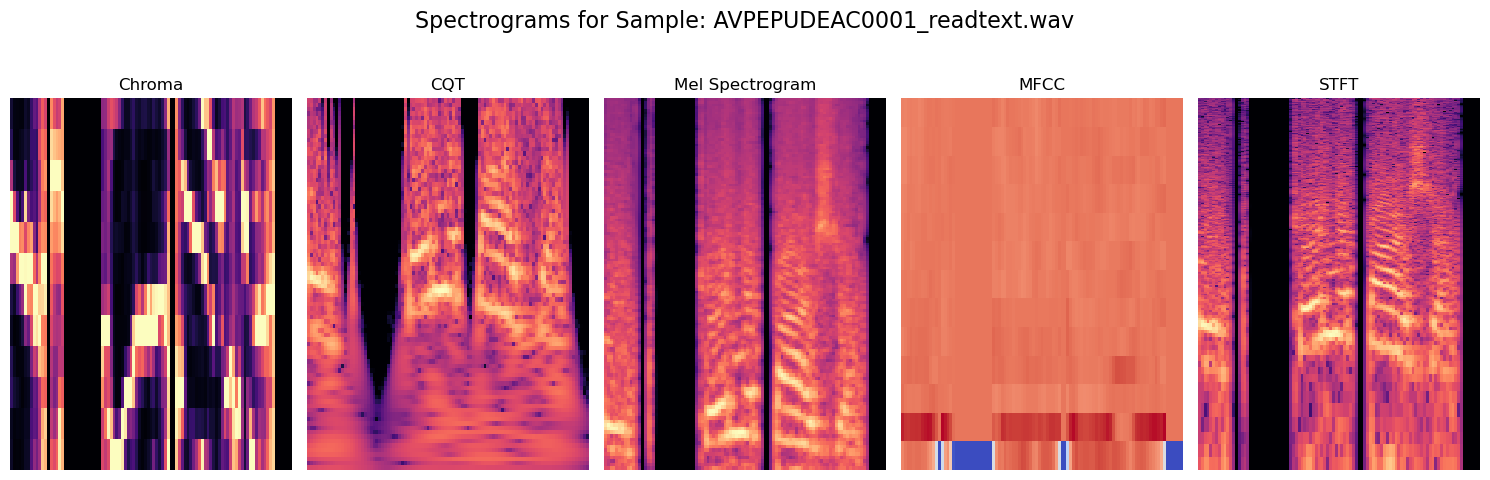

In [14]:
def display_sample_spectrogram(y_segment, sr, sample_name):
    fig, axes = plt.subplots(1, len(types), figsize=(15, 5))
    fig.suptitle(f"Spectrograms for Sample: {sample_name}", fontsize=16)  # Set the main title

    for idx, img_type in enumerate(types):
        ax = axes[idx]
        if img_type == 'chroma':
            chroma = librosa.feature.chroma_stft(y=y_segment, sr=sr)
            librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', ax=ax)
            ax.set_title('Chroma')
        elif img_type == 'cqt':
            cqt = librosa.amplitude_to_db(np.abs(librosa.cqt(y_segment, sr=sr)), ref=np.max)
            librosa.display.specshow(cqt, sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
            ax.set_title('CQT')
        elif img_type == 'mel':
            mel = librosa.feature.melspectrogram(y=y_segment, sr=sr)
            librosa.display.specshow(librosa.power_to_db(mel, ref=np.max), sr=sr, x_axis='time', y_axis='mel', ax=ax)
            ax.set_title('Mel Spectrogram')
        elif img_type == 'mfcc':
            mfcc = librosa.feature.mfcc(y=y_segment, sr=sr, n_mfcc=13)
            librosa.display.specshow(mfcc, x_axis='time', ax=ax)
            ax.set_title('MFCC')
        elif img_type == 'stft':
            n_fft = min(2048, len(y_segment) // 2)
            stft = librosa.amplitude_to_db(np.abs(librosa.stft(y_segment, n_fft=n_fft)), ref=np.max)
            librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='log', ax=ax)
            ax.set_title('STFT')

        ax.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for the title
    plt.show()

# Load a sample file and display the spectrograms
sample_file = os.path.join(input_base_path, categories[0], os.listdir(os.path.join(input_base_path, categories[0]))[0])
y, sr = librosa.load(sample_file, sr=None)
st_energy, spectral_spread = compute_energy_spread(y, sr)
speech_segments = vad_segmentation(y, sr, st_energy, spectral_spread, threshold_factor)

if speech_segments:
    segment_indices = speech_segments[0]
    start = segment_indices[0] * int(sr * vad_window_size)
    end = segment_indices[-1] * int(sr * vad_window_size)
    y_segment = y[start:end]
    
    display_sample_spectrogram(y_segment, sr, os.path.basename(sample_file))


In [ ]:
FOR DATASET-I

In [6]:
import os
import librosa
import numpy as np
from scipy.io.wavfile import write
from pydub import AudioSegment
from pydub.silence import split_on_silence

# Define paths
input_base_path = r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText'
output_base_path = r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText'
folders = ['HC', 'PD']

# Helper function to perform noise reduction
def noise_reduction(y, sr, reduction_factor=0.8):
    noise_sample = y[:sr]  # Take the first second as a noise sample
    noise_profile = np.mean(np.abs(noise_sample)) * reduction_factor
    return np.where(np.abs(y) > noise_profile, y, 0)  # Zero out low-amplitude noise

# Function to process and clean each file
def process_audio(file_path, output_path, silence_thresh=-40, min_silence_len=500):
    try:
        # Load the audio file
        y, sr = librosa.load(file_path, sr=None)

        # Noise reduction
        y_cleaned = noise_reduction(y, sr)

        # Convert to Pydub AudioSegment for silence splitting
        audio_segment = AudioSegment(
            y_cleaned.tobytes(), 
            frame_rate=sr, 
            sample_width=y_cleaned.dtype.itemsize, 
            channels=1
        )

        # Split on silence
        chunks = split_on_silence(
            audio_segment,
            min_silence_len=min_silence_len,  # Minimum silence length to split
            silence_thresh=silence_thresh  # Silence threshold in dB
        )

        # Concatenate chunks to remove silences
        cleaned_audio = AudioSegment.empty()
        for chunk in chunks:
            cleaned_audio += chunk

        # Export cleaned audio
        cleaned_audio.export(output_path, format="wav")
        print(f"Processed {file_path} and saved to {output_path}")

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Main processing loop
for folder in folders:
    input_folder = os.path.join(input_base_path, folder)
    output_folder = os.path.join(output_base_path, f"{folder}_Cleaned")
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(input_folder):
        if filename.endswith(".wav"):
            input_file = os.path.join(input_folder, filename)
            output_file = os.path.join(output_folder, filename)
            process_audio(input_file, output_file)


Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID00_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\HC_Cleaned\ID00_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID01_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\HC_Cleaned\ID01_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID03_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\HC_Cleaned\ID03_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID05_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\HC_Cleaned\ID05_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID08_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\C

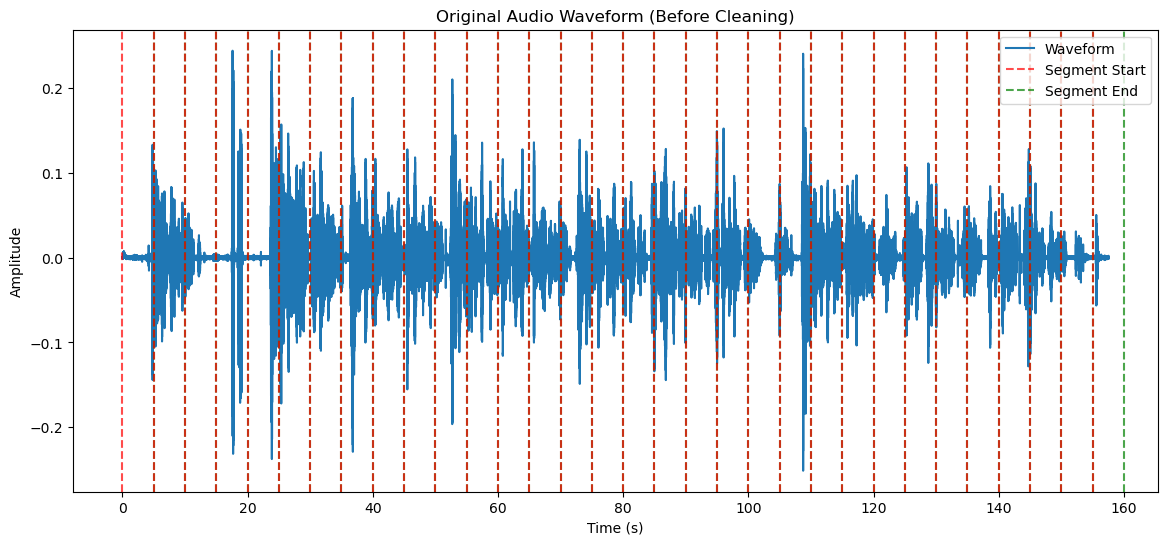

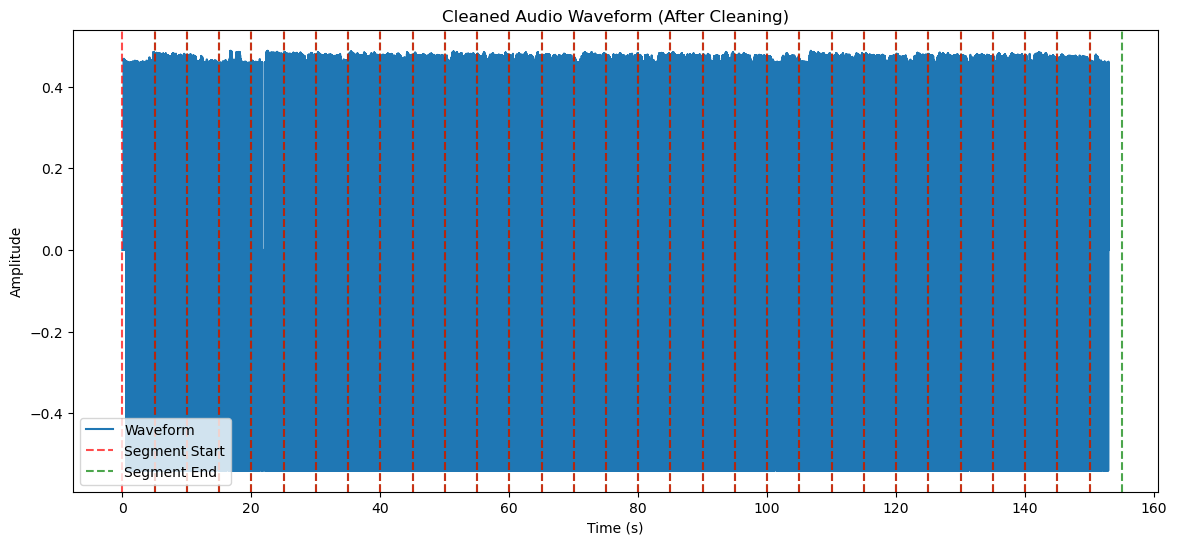

In [13]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Define paths for an example audio file (before and after cleaning)
original_file = r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\PD\ID02_pd_2_0_0.wav'
cleaned_file = r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\PD_Cleaned\ID02_pd_2_0_0.wav'

# Load audio files
y_original, sr = librosa.load(original_file, sr=None)
y_cleaned, sr_cleaned = librosa.load(cleaned_file, sr=None)

# Define a function to plot waveforms with segmentation
def plot_waveform(y, sr, title, segment_duration=5):
    plt.figure(figsize=(14, 6))
    time = np.linspace(0, len(y) / sr, len(y))
    plt.plot(time, y, label="Waveform")
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    # Plot each segment
    segment_samples = segment_duration * sr
    num_segments = len(y) // segment_samples
    for i in range(num_segments + 1):
        start = i * segment_samples
        end = start + segment_samples
        plt.axvline(x=start / sr, color="r", linestyle="--", alpha=0.7)
        plt.axvline(x=end / sr, color="g", linestyle="--", alpha=0.7)
    
    plt.legend(['Waveform', 'Segment Start', 'Segment End'])
    plt.show()

# Plot the original waveform with segmentation
plot_waveform(y_original, sr, "Original Audio Waveform (Before Cleaning)")

# Plot the cleaned waveform with segmentation
plot_waveform(y_cleaned, sr_cleaned, "Cleaned Audio Waveform (After Cleaning)")


Original Duration: 118.37 seconds
Cleaned Duration: 109.63 seconds
Time Reduced: 8.74 seconds


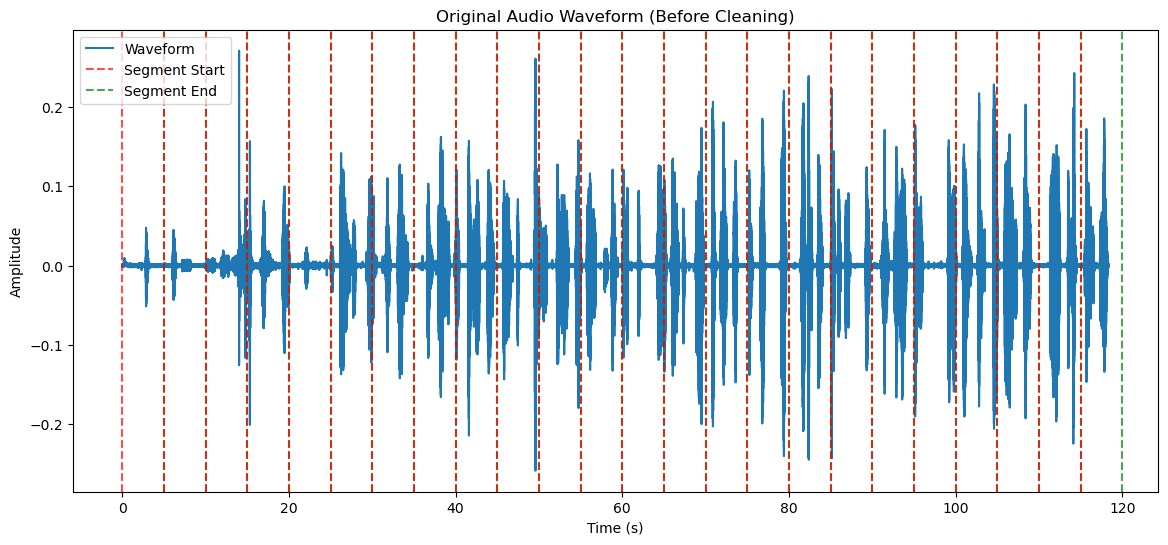

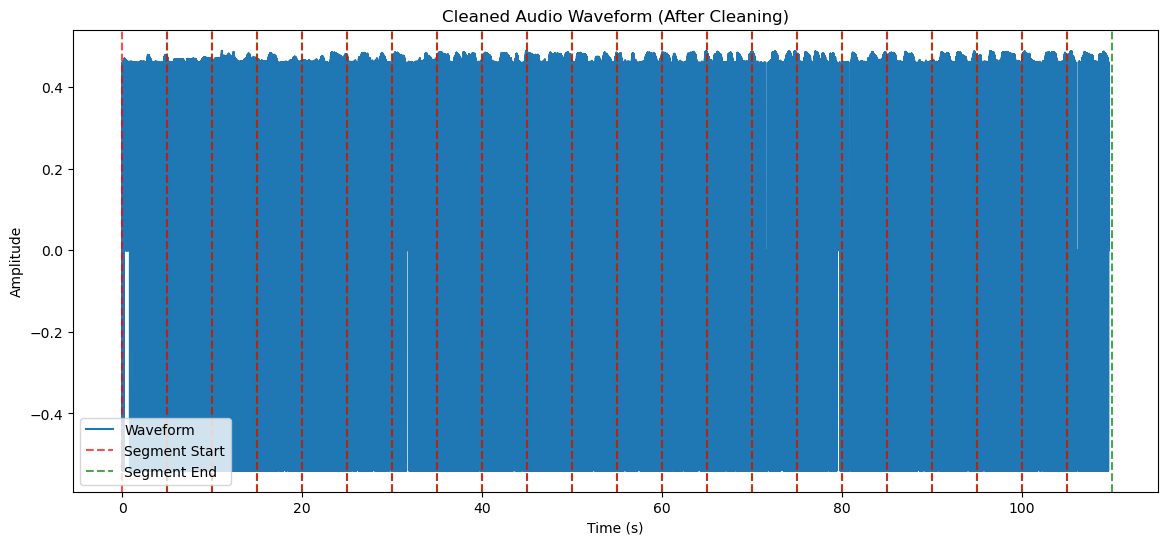

In [12]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Define paths for an example audio file (before and after cleaning)
original_file = r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\PD\ID33_pd_3_2_2.wav'
cleaned_file = r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\PD_Cleaned\ID33_pd_3_2_2.wav'

# Load audio files
y_original, sr = librosa.load(original_file, sr=None)
y_cleaned, sr_cleaned = librosa.load(cleaned_file, sr=None)

# Calculate durations before and after cleaning
original_duration = len(y_original) / sr
cleaned_duration = len(y_cleaned) / sr
reduction = original_duration - cleaned_duration

# Print the durations
print(f"Original Duration: {original_duration:.2f} seconds")
print(f"Cleaned Duration: {cleaned_duration:.2f} seconds")
print(f"Time Reduced: {reduction:.2f} seconds")

# Define a function to plot waveforms with segmentation
def plot_waveform(y, sr, title, segment_duration=5):
    plt.figure(figsize=(14, 6))
    time = np.linspace(0, len(y) / sr, len(y))
    plt.plot(time, y, label="Waveform")
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    # Plot each segment
    segment_samples = segment_duration * sr
    num_segments = len(y) // segment_samples
    for i in range(num_segments + 1):
        start = i * segment_samples
        end = start + segment_samples
        plt.axvline(x=start / sr, color="r", linestyle="--", alpha=0.7)
        plt.axvline(x=end / sr, color="g", linestyle="--", alpha=0.7)
    
    plt.legend(['Waveform', 'Segment Start', 'Segment End'])
    plt.show()

# Plot the original waveform with segmentation
plot_waveform(y_original, sr, "Original Audio Waveform (Before Cleaning)")

# Plot the cleaned waveform with segmentation
plot_waveform(y_cleaned, sr_cleaned, "Cleaned Audio Waveform (After Cleaning)")


In [11]:
import os
import librosa
import numpy as np
from pydub import AudioSegment
from pydub.silence import split_on_silence

# Define paths
input_base_path = r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText'
output_base_path = r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText'
folders = ['HC', 'PD']

# Helper function to perform noise reduction
def noise_reduction(y, sr, reduction_factor=1.0):
    # Take the first second as a noise sample
    noise_sample = y[:sr]  
    # Calculate a noise threshold based on the average amplitude in the noise sample
    noise_profile = np.mean(np.abs(noise_sample)) * reduction_factor
    # Set values below the noise threshold to zero
    return np.where(np.abs(y) > noise_profile, y, 0)

# Function to process and clean each file
def process_audio(file_path, output_path, silence_thresh=-30, min_silence_len=700):
    try:
        # Load the audio file
        y, sr = librosa.load(file_path, sr=None)

        # Apply noise reduction
        y_cleaned = noise_reduction(y, sr, reduction_factor=1.0)

        # Convert to Pydub AudioSegment to enable silence splitting
        audio_segment = AudioSegment(
            y_cleaned.tobytes(), 
            frame_rate=sr, 
            sample_width=y_cleaned.dtype.itemsize, 
            channels=1
        )

        # Split on silence with more aggressive parameters
        chunks = split_on_silence(
            audio_segment,
            min_silence_len=min_silence_len,  # Minimum silence length to split
            silence_thresh=silence_thresh  # Silence threshold in dB
        )

        # Concatenate chunks to remove silences
        cleaned_audio = AudioSegment.empty()
        for chunk in chunks:
            cleaned_audio += chunk

        # Export cleaned audio
        cleaned_audio.export(output_path, format="wav")
        print(f"Processed {file_path} and saved to {output_path}")

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Main processing loop
for folder in folders:
    input_folder = os.path.join(input_base_path, folder)
    output_folder = os.path.join(output_base_path, f"{folder}_Cleaned")
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(input_folder):
        if filename.endswith(".wav"):
            input_file = os.path.join(input_folder, filename)
            output_file = os.path.join(output_folder, filename)
            process_audio(input_file, output_file)


Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID00_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\HC_Cleaned\ID00_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID01_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\HC_Cleaned\ID01_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID03_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\HC_Cleaned\ID03_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID05_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\HC_Cleaned\ID05_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID08_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\C

In [17]:
import os
import librosa
import numpy as np
import pandas as pd
from pydub import AudioSegment
from pydub.silence import split_on_silence

# Define paths
input_base_path = r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText'
output_base_path = r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText'
folders = ['HC', 'PD']

# Initialize an empty list to store data for the table
duration_data = []

# Helper function to perform noise reduction
def noise_reduction(y, sr, reduction_factor=1.2):  # Increased reduction factor
    # Take the first second as a noise sample
    noise_sample = y[:sr]  
    # Calculate a noise threshold based on the average amplitude in the noise sample
    noise_profile = np.mean(np.abs(noise_sample)) * reduction_factor
    # Set values below the noise threshold to zero
    return np.where(np.abs(y) > noise_profile, y, 0)

# Function to process and clean each file
def process_audio(file_path, output_path, silence_thresh=-25, min_silence_len=1000):  # Adjusted parameters
    try:
        # Load the original audio file and calculate its duration
        y, sr = librosa.load(file_path, sr=None)
        original_duration = len(y) / sr

        # Apply noise reduction and calculate duration after noise reduction
        y_cleaned = noise_reduction(y, sr, reduction_factor=1.2)
        noise_reduced_duration = len(y_cleaned[y_cleaned != 0]) / sr  # Count only non-zero samples

        # Convert to Pydub AudioSegment to enable silence splitting
        audio_segment = AudioSegment(
            y_cleaned.tobytes(), 
            frame_rate=sr, 
            sample_width=y_cleaned.dtype.itemsize, 
            channels=1
        )

        # Split on silence with more aggressive parameters
        chunks = split_on_silence(
            audio_segment,
            min_silence_len=min_silence_len,  # Minimum silence length to split
            silence_thresh=silence_thresh  # Silence threshold in dB
        )

        # Concatenate chunks to remove silences
        cleaned_audio = AudioSegment.empty()
        for chunk in chunks:
            cleaned_audio += chunk

        # Calculate final duration after silence removal
        final_duration = len(cleaned_audio) / 1000  # Convert from ms to seconds

        # Export cleaned audio
        cleaned_audio.export(output_path, format="wav")
        print(f"Processed {file_path} and saved to {output_path}")

        # Append data for this file to the table
        duration_data.append({
            "Filename": os.path.basename(file_path),
            "Original Duration (s)": original_duration,
            "After Noise Reduction (s)": noise_reduced_duration,
            "After Silence Removal (s)": final_duration
        })

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Main processing loop
for folder in folders:
    input_folder = os.path.join(input_base_path, folder)
    output_folder = os.path.join(output_base_path, f"{folder}_Cleaned")
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(input_folder):
        if filename.endswith(".wav"):
            input_file = os.path.join(input_folder, filename)
            output_file = os.path.join(output_folder, filename)
            process_audio(input_file, output_file)

# Convert duration data to a DataFrame and display the table
duration_df = pd.DataFrame(duration_data)
print(duration_df)


Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID00_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\HC_Cleaned\ID00_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID01_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\HC_Cleaned\ID01_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID03_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\HC_Cleaned\ID03_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID05_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\HC_Cleaned\ID05_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID08_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\C

In [8]:
import os
import librosa
import numpy as np
import pandas as pd
from pydub import AudioSegment
from pydub.silence import split_on_silence

# Define paths
input_base_path = r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText'
output_base_path = r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText'
folders = ['HC', 'PD']

# Initialize an empty list to store data for the table
duration_data = []

# Helper function to perform noise reduction
def noise_reduction(y, sr, reduction_factor=1.2):  # Increased reduction factor
    noise_sample = y[:sr]  # Take the first second as a noise sample
    noise_profile = np.mean(np.abs(noise_sample)) * reduction_factor
    return np.where(np.abs(y) > noise_profile, y, 0)

# Function to process and clean each file
def process_audio(file_path, output_path, silence_thresh=-25, min_silence_len=1000):  # Adjusted parameters
    try:
        # Load the original audio file and calculate its duration
        y, sr = librosa.load(file_path, sr=None)
        original_duration = len(y) / sr

        # Apply noise reduction and calculate duration after noise reduction
        y_cleaned = noise_reduction(y, sr, reduction_factor=1.2)
        noise_reduced_duration = len(y_cleaned[y_cleaned != 0]) / sr  # Count only non-zero samples

        # Convert to Pydub AudioSegment to enable silence splitting
        audio_segment = AudioSegment(
            y_cleaned.tobytes(), 
            frame_rate=sr, 
            sample_width=y_cleaned.dtype.itemsize, 
            channels=1
        )

        # Split on silence with more aggressive parameters
        chunks = split_on_silence(
            audio_segment,
            min_silence_len=min_silence_len,  # Minimum silence length to split
            silence_thresh=silence_thresh  # Silence threshold in dB
        )

        # Concatenate chunks to remove silences
        cleaned_audio = AudioSegment.empty()
        for chunk in chunks:
            cleaned_audio += chunk

        # Calculate final duration after silence removal
        final_duration = len(cleaned_audio) / 1000  # Convert from ms to seconds

        # Export cleaned audio
        cleaned_audio.export(output_path, format="wav")
        print(f"Processed {file_path} and saved to {output_path}")

        # Append data for this file to the table
        duration_data.append({
            "Filename": os.path.basename(file_path),
            "Original Duration (s)": original_duration,
            "After Noise Reduction (s)": noise_reduced_duration,
            "After Silence Removal (s)": final_duration
        })

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Main processing loop
for folder in folders:
    input_folder = os.path.join(input_base_path, folder)
    output_folder = os.path.join(output_base_path, f"{folder}_Cleaned")
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(input_folder):
        if filename.endswith(".wav"):
            input_file = os.path.join(input_folder, filename)
            output_file = os.path.join(output_folder, filename)
            process_audio(input_file, output_file)

# Convert duration data to a DataFrame and display the table
duration_df = pd.DataFrame(duration_data)
print("\nFinal Duration Data:")
print(duration_df.to_string(index=False))


Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID00_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\HC_Cleaned\ID00_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID01_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\HC_Cleaned\ID01_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID03_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\HC_Cleaned\ID03_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID05_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\HC_Cleaned\ID05_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID08_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\C

In [29]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from scipy.ndimage import median_filter

# Define paths
input_base_path = r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText'
output_base_path = r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadTextCONVERTED'
categories = ['HC_Cleaned', 'PD_Cleaned']
types = ['chroma', 'cqt', 'mel', 'mfcc', 'stft']

# VAD segmentation parameters
vad_window_size = 0.02  # 20 ms window
merge_distance = 0.25  # 250 ms merge threshold
threshold_factor = 0.7  # Adjusted threshold factor

# Minimum segment duration in samples (e.g., 1 second)
min_segment_samples = int(1 * 44100)  # 44.1 kHz sample rate

# Helper function for short-term energy and spectral spread
def compute_energy_spread(y, sr, frame_length=2048, hop_length=512):
    st_energy = np.array([sum(abs(y[i:i+frame_length])**2) for i in range(0, len(y), hop_length)])
    st_energy = median_filter(st_energy, size=5)  # Apply median filter to smooth energy
    
    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr, hop_length=hop_length)
    spectral_spread = np.sqrt(np.mean((spectral_centroids - np.mean(spectral_centroids))**2))
    spectral_spread = median_filter(spectral_spread, size=5)  # Apply median filter to smooth spread
    
    return st_energy, spectral_spread

# Function to apply VAD and segment audio
def vad_segmentation(y, sr, st_energy, spectral_spread, threshold_factor=0.5):
    speech_segments = []
    
    # Calculate threshold values
    energy_threshold = np.percentile(st_energy, 30) * threshold_factor
    spread_threshold = np.percentile(spectral_spread, 30) * threshold_factor
    print(f"Energy threshold: {energy_threshold}, Spread threshold: {spread_threshold}")
    
    is_speech = (st_energy > energy_threshold) & (spectral_spread > spread_threshold)
    current_segment = []
    
    for i, frame in enumerate(is_speech):
        if frame:
            current_segment.append(i)
        elif current_segment:
            if len(speech_segments) > 0 and (i - speech_segments[-1][-1] <= int(merge_distance * sr / (vad_window_size * sr))):
                speech_segments[-1].extend(current_segment)
            else:
                if len(current_segment) * int(sr * vad_window_size) >= min_segment_samples:
                    speech_segments.append(current_segment)
            current_segment = []
    
    if not speech_segments:
        print("No segments found after applying thresholds.")
    return speech_segments

# Function to save spectrogram as image without padding or axis
def save_spectrogram(y_segment, sr, img_type, category_folder, filename):
    plt.figure(figsize=(6, 6))
    if img_type == 'chroma':
        chroma = librosa.feature.chroma_stft(y=y_segment, sr=sr)
        librosa.display.specshow(chroma, x_axis='time', y_axis='chroma')
    elif img_type == 'cqt':
        cqt = librosa.amplitude_to_db(np.abs(librosa.cqt(y_segment, sr=sr)), ref=np.max)
        librosa.display.specshow(cqt, sr=sr, x_axis='time', y_axis='cqt_note')
    elif img_type == 'mel':
        mel = librosa.feature.melspectrogram(y=y_segment, sr=sr)
        librosa.display.specshow(librosa.power_to_db(mel, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
    elif img_type == 'mfcc':
        mfcc = librosa.feature.mfcc(y=y_segment, sr=sr, n_mfcc=13)
        librosa.display.specshow(mfcc, x_axis='time')
    elif img_type == 'stft':
        n_fft = min(2048, len(y_segment) // 2)  # Dynamic n_fft based on segment length
        stft = librosa.amplitude_to_db(np.abs(librosa.stft(y_segment, n_fft=n_fft)), ref=np.max)
        librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='log')
    else:
        return

    plt.axis('off')  # Remove padding and titles
    output_img_path = os.path.join(category_folder, f"{filename}.png")
    plt.savefig(output_img_path, bbox_inches='tight', pad_inches=0)
    plt.close()

# Process each audio file
for category in categories:
    input_folder = os.path.join(input_base_path, category)
    category_label = 'HC' if 'HC' in category else 'PD'

    for filename in os.listdir(input_folder):
        if filename.endswith(".wav"):
            input_file = os.path.join(input_folder, filename)
            try:
                y, sr = librosa.load(input_file, sr=None)

                st_energy, spectral_spread = compute_energy_spread(y, sr)

                # Apply VAD and obtain speech segments
                speech_segments = vad_segmentation(y, sr, st_energy, spectral_spread, threshold_factor)

                if not speech_segments:
                    print(f"No speech segments found for {filename}")
                    continue

                print(f"Found {len(speech_segments)} segments for {filename}")

                # Save each segment in each spectrogram type folder
                for idx, segment_indices in enumerate(speech_segments):
                    start = segment_indices[0] * int(sr * vad_window_size)
                    end = segment_indices[-1] * int(sr * vad_window_size)
                    y_segment = y[start:end]

                    if len(y_segment) < min_segment_samples:
                        print(f"Segment {filename}_seg{idx+1} too short, skipping...")
                        continue

                    # Save each spectrogram type within its respective folder
                    for img_type in types:
                        # Define path for each spectrogram type and category
                        type_folder = os.path.join(output_base_path, img_type, category_label)
                        os.makedirs(type_folder, exist_ok=True)

                        # Save spectrogram image for the current segment
                        save_spectrogram(y_segment, sr, img_type, type_folder, f"{os.path.splitext(filename)[0]}_seg{idx+1}_{img_type}")

                print(f"Processed and saved segments for {filename}")

            except Exception as e:
                print(f"Error processing {filename}: {e}")


Energy threshold: 45.225082804709665, Spread threshold: 2058.355211134268
Found 62 segments for ID00_hc_0_0_0.wav
Segment ID00_hc_0_0_0.wav_seg21 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg25 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg34 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg35 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg36 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg37 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg38 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg39 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg40 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg41 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg42 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg43 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg44 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg45 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg46 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg47 too short, skipping...
Segmen

Energy threshold: 45.225082804709665, Spread threshold: 2058.355211134268


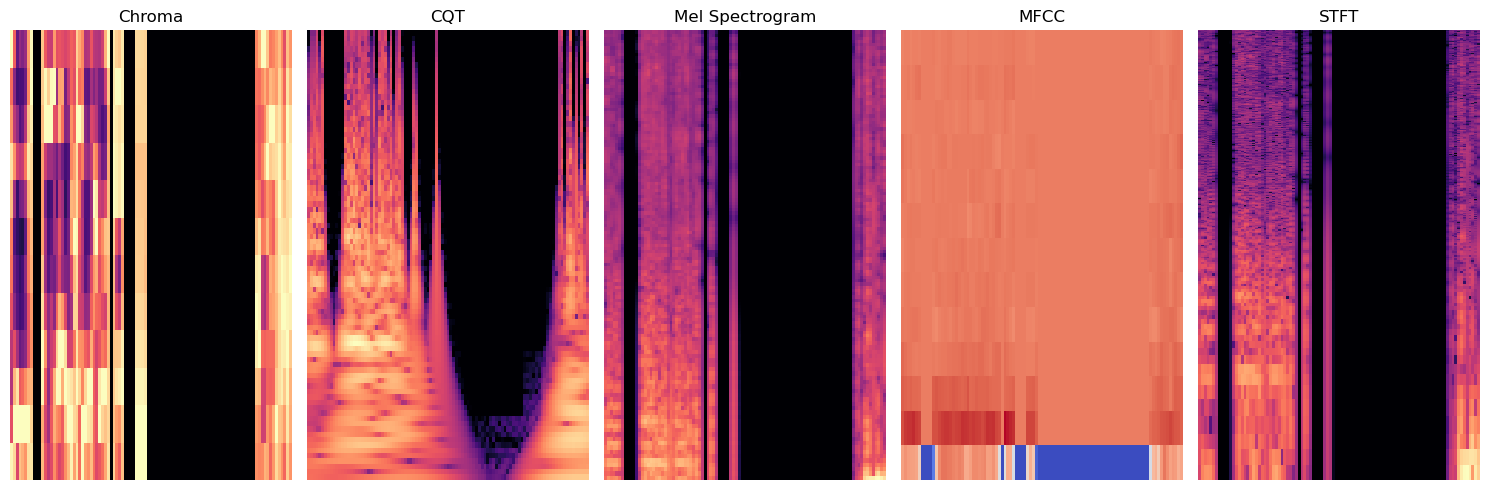

In [30]:
def display_sample_spectrogram(y_segment, sr):
    fig, axes = plt.subplots(1, len(types), figsize=(15, 5))
    for idx, img_type in enumerate(types):
        ax = axes[idx]
        if img_type == 'chroma':
            chroma = librosa.feature.chroma_stft(y=y_segment, sr=sr)
            librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', ax=ax)
            ax.set_title('Chroma')
        elif img_type == 'cqt':
            cqt = librosa.amplitude_to_db(np.abs(librosa.cqt(y_segment, sr=sr)), ref=np.max)
            librosa.display.specshow(cqt, sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
            ax.set_title('CQT')
        elif img_type == 'mel':
            mel = librosa.feature.melspectrogram(y=y_segment, sr=sr)
            librosa.display.specshow(librosa.power_to_db(mel, ref=np.max), sr=sr, x_axis='time', y_axis='mel', ax=ax)
            ax.set_title('Mel Spectrogram')
        elif img_type == 'mfcc':
            mfcc = librosa.feature.mfcc(y=y_segment, sr=sr, n_mfcc=13)
            librosa.display.specshow(mfcc, x_axis='time', ax=ax)
            ax.set_title('MFCC')
        elif img_type == 'stft':
            n_fft = min(2048, len(y_segment) // 2)
            stft = librosa.amplitude_to_db(np.abs(librosa.stft(y_segment, n_fft=n_fft)), ref=np.max)
            librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='log', ax=ax)
            ax.set_title('STFT')

        ax.axis('off')  # Remove axes for a cleaner view

    plt.tight_layout()
    plt.show()

# Load an audio file and extract a segment to use as a sample
sample_file = os.path.join(input_base_path, categories[0], os.listdir(os.path.join(input_base_path, categories[0]))[0])
y, sr = librosa.load(sample_file, sr=None)
st_energy, spectral_spread = compute_energy_spread(y, sr)
speech_segments = vad_segmentation(y, sr, st_energy, spectral_spread, threshold_factor)

if speech_segments:
    # Select the first valid segment for visualization
    segment_indices = speech_segments[0]
    start = segment_indices[0] * int(sr * vad_window_size)
    end = segment_indices[-1] * int(sr * vad_window_size)
    y_segment = y[start:end]
    
    display_sample_spectrogram(y_segment, sr)


Energy threshold: 45.225082804709665, Spread threshold: 2058.355211134268


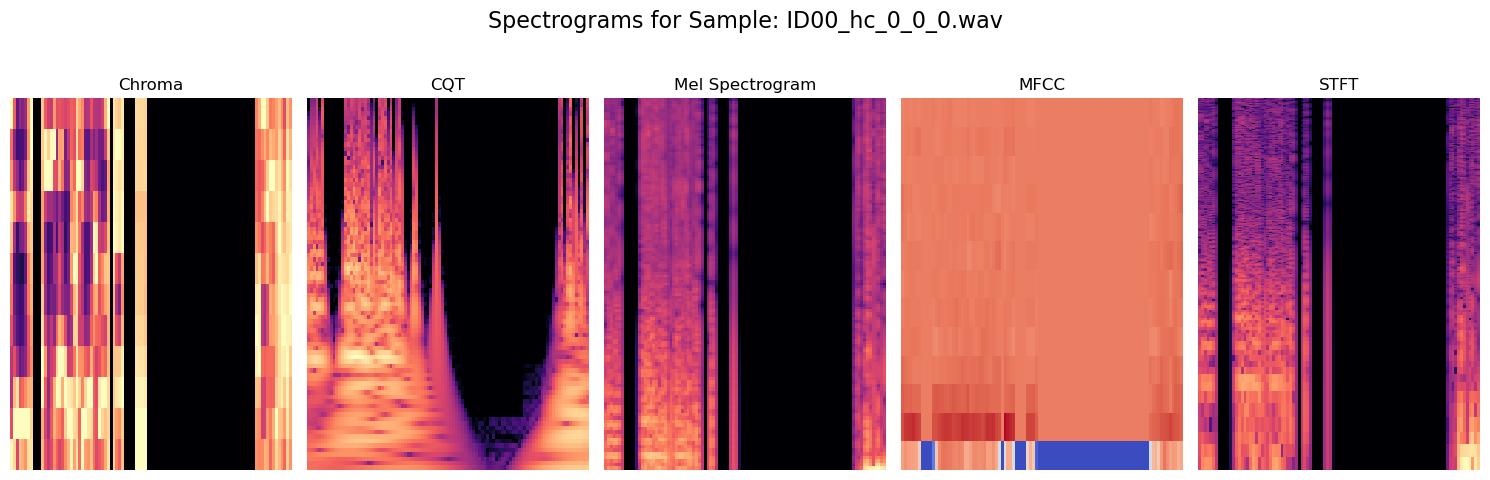

In [31]:
def display_sample_spectrogram(y_segment, sr, sample_name):
    fig, axes = plt.subplots(1, len(types), figsize=(15, 5))
    fig.suptitle(f"Spectrograms for Sample: {sample_name}", fontsize=16)  # Set the main title

    for idx, img_type in enumerate(types):
        ax = axes[idx]
        if img_type == 'chroma':
            chroma = librosa.feature.chroma_stft(y=y_segment, sr=sr)
            librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', ax=ax)
            ax.set_title('Chroma')
        elif img_type == 'cqt':
            cqt = librosa.amplitude_to_db(np.abs(librosa.cqt(y_segment, sr=sr)), ref=np.max)
            librosa.display.specshow(cqt, sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
            ax.set_title('CQT')
        elif img_type == 'mel':
            mel = librosa.feature.melspectrogram(y=y_segment, sr=sr)
            librosa.display.specshow(librosa.power_to_db(mel, ref=np.max), sr=sr, x_axis='time', y_axis='mel', ax=ax)
            ax.set_title('Mel Spectrogram')
        elif img_type == 'mfcc':
            mfcc = librosa.feature.mfcc(y=y_segment, sr=sr, n_mfcc=13)
            librosa.display.specshow(mfcc, x_axis='time', ax=ax)
            ax.set_title('MFCC')
        elif img_type == 'stft':
            n_fft = min(2048, len(y_segment) // 2)
            stft = librosa.amplitude_to_db(np.abs(librosa.stft(y_segment, n_fft=n_fft)), ref=np.max)
            librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='log', ax=ax)
            ax.set_title('STFT')

        ax.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for the title
    plt.show()

# Load a sample file and display the spectrograms
sample_file = os.path.join(input_base_path, categories[0], os.listdir(os.path.join(input_base_path, categories[0]))[0])
y, sr = librosa.load(sample_file, sr=None)
st_energy, spectral_spread = compute_energy_spread(y, sr)
speech_segments = vad_segmentation(y, sr, st_energy, spectral_spread, threshold_factor)

if speech_segments:
    segment_indices = speech_segments[0]
    start = segment_indices[0] * int(sr * vad_window_size)
    end = segment_indices[-1] * int(sr * vad_window_size)
    y_segment = y[start:end]
    
    display_sample_spectrogram(y_segment, sr, os.path.basename(sample_file))
